## Regresión lineal simple 
### Se intenta predecir el precio de una casa dado los datos 

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Distribución de la variable objetivo

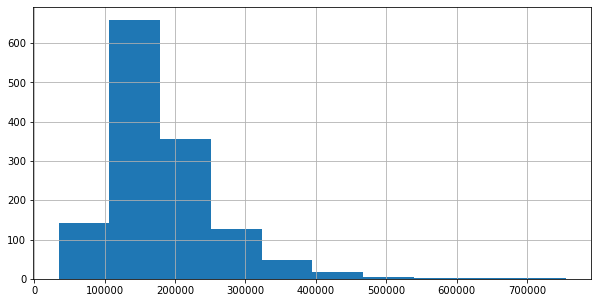

In [25]:
plt.figure(figsize = (10,5))
training.SalePrice.hist()
plt.show()

In [6]:
testing = pd.read_csv('https://raw.githubusercontent.com/adolfollin/Bourbaki/master/primerCurso/Datos/datos-testingSet.csv')
training = pd.read_csv('https://raw.githubusercontent.com/adolfollin/Bourbaki/master/primerCurso/Datos/datos-trainingSet.csv')

In [15]:
training.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [16]:
training.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
testing.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
1,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000


### Distribución de la variable GrLivArea

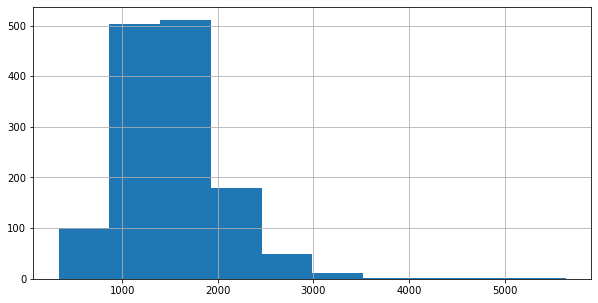

In [27]:
plt.figure(figsize = (10,5))
training.GrLivArea.hist()
plt.show()

## Grafica de precio vs GrLivArea


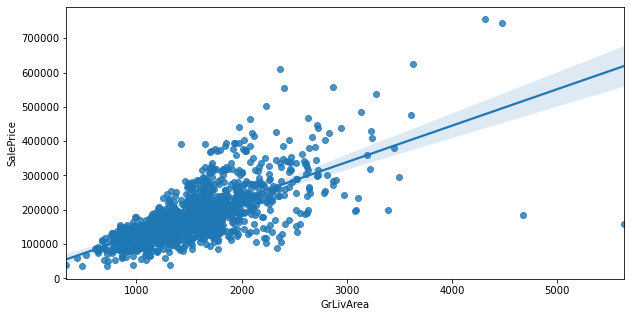

In [29]:
plt.figure(figsize = (10,5))
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = training)
plt.show()


## Modelo de regresión lineal simple

In [31]:
# rl sera el objeto donde la función se importada de regresion lineal 
rl = LinearRegression()

# rl le pedimos que utilice el metodo fit para entrenar nuestro modelo
modelo = rl.fit(X = np.array(training.GrLivArea).reshape(-1,1), y = training.SalePrice)

In [35]:
print('Ordenada al origen :', modelo.intercept_)
print('\n')
print('Beta :', modelo.coef_)

Ordenada al origen : 20215.585681158584


Beta : [106.20104098]


##  testing set Predicciones

In [38]:
predicciones = modelo.predict(X = np.array(testing.GrLivArea).reshape(-1,1))


In [54]:
# Creando DataFrame
resultados = pd.DataFrame({'id': testing.Id, 'area ' : testing.GrLivArea, 'Precioreal' : testing.SalePrice, 'Predicciones' : predicciones, 'Error ' : predicciones - testing.SalePrice})

In [55]:
resultados.set_index('id', inplace = True)

In [56]:
resultados.head()

,area,Precioreal,Predicciones,Error
id,,,,
11,1040,129500,130664.668303,1164.668303
41,1324,160000,160825.763942,825.763942
151,969,122000,123124.394393,1124.394393
254,1302,158000,158489.341041,489.341041
490,630,86000,87122.241500,1122.241500


In [58]:
resultados.loc[[254,494,519], :]

,area,Precioreal,Predicciones,Error
id,,,,
254,1302,158000,158489.341041,489.341041
494,1269,155000,154984.706688,-15.293312
519,1796,211000,210952.655286,-47.344714


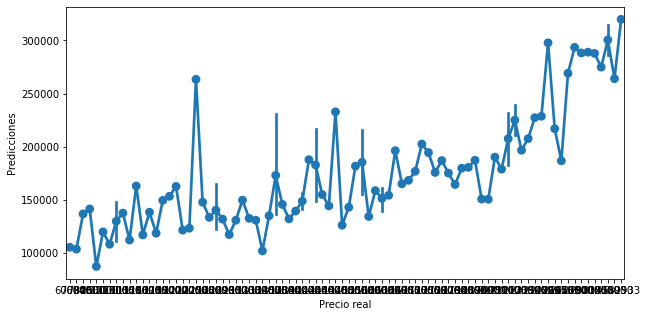

In [52]:
plt.figure(figsize = (10,5))
sns.pointplot(x = 'Precio real', y = 'Predicciones', data = resultados )
plt.show()

## Calidad del Modelo 

In [60]:
print('Error cuadratico medio : ', mean_squared_error(resultados.Precioreal, y_pred = resultados.Predicciones))

Error cuadratico medio :  2054801713.3161552


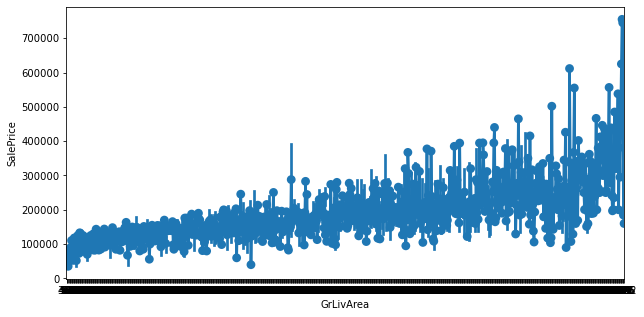

In [64]:
plt.figure(figsize = (10,5))
sns.pointplot(x = 'GrLivArea', y = 'SalePrice', data = training )
plt.show()

## FIN